# **Project : Predictions On Heart Disease**

## **Libraries**

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Importing Classifiers, scalers, etc...
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

## **Training Dataset**

In [3]:
df = pd.read_csv('heart.csv')

1.	age
2.	sex(male:1, female:0)
3.	chest pain type (4 values)
4.	resting blood pressure
5.	serum cholestoral in mg/dl
6.	fasting blood sugar > 120 mg/dl
7.	resting electrocardiographic results (values 0,1,2)
8.	maximum heart rate achieved
9.	exercise induced angina
10.	oldpeak = ST depression induced by exercise relative to rest
11.	the slope of the peak exercise ST segment
12.	number of major vessels (0-3) colored by flourosopy
13.	thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
# Lets Chackn if there is any null values in any of the series of the dataset 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## **Test Dataset(Unseen Dataset)**

In [9]:
test = pd.read_csv('heart_test.csv')

In [10]:
test.shape

(303, 14)

In [11]:
test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
cat_variables = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
data_test = pd.get_dummies(test, columns = cat_variables)
data_test.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [13]:
scaler = StandardScaler()
cl_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
data_test[cl_to_scale] = scaler.fit_transform(data_test[cl_to_scale])
data_test.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [14]:
test_X = data_test.drop('output', axis=1)
test_y = data_test.output

## **EXPLORATORY DATA ANALYSIS**

<Axes: xlabel='target', ylabel='count'>

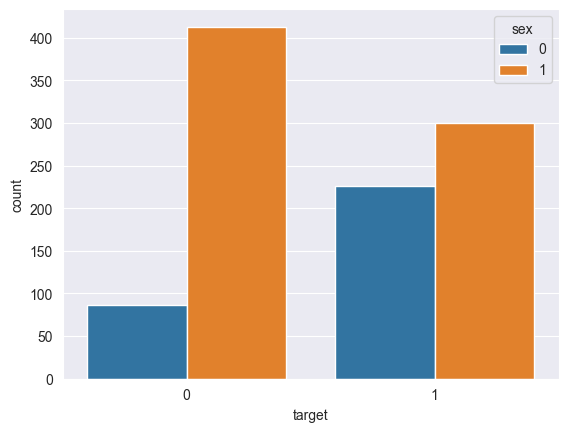

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='target', hue='sex', data=df)

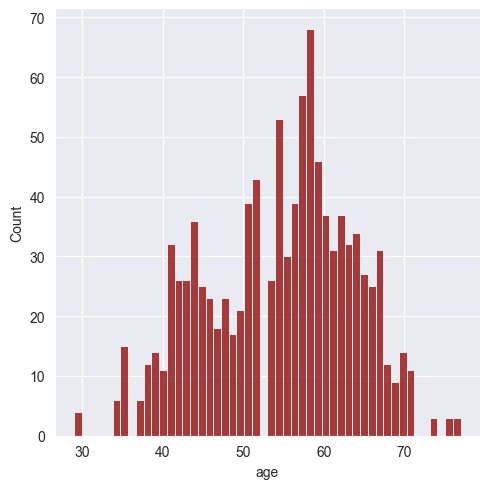

In [16]:
sns.displot(df['age'], kde=False, color='darkred', bins=50)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

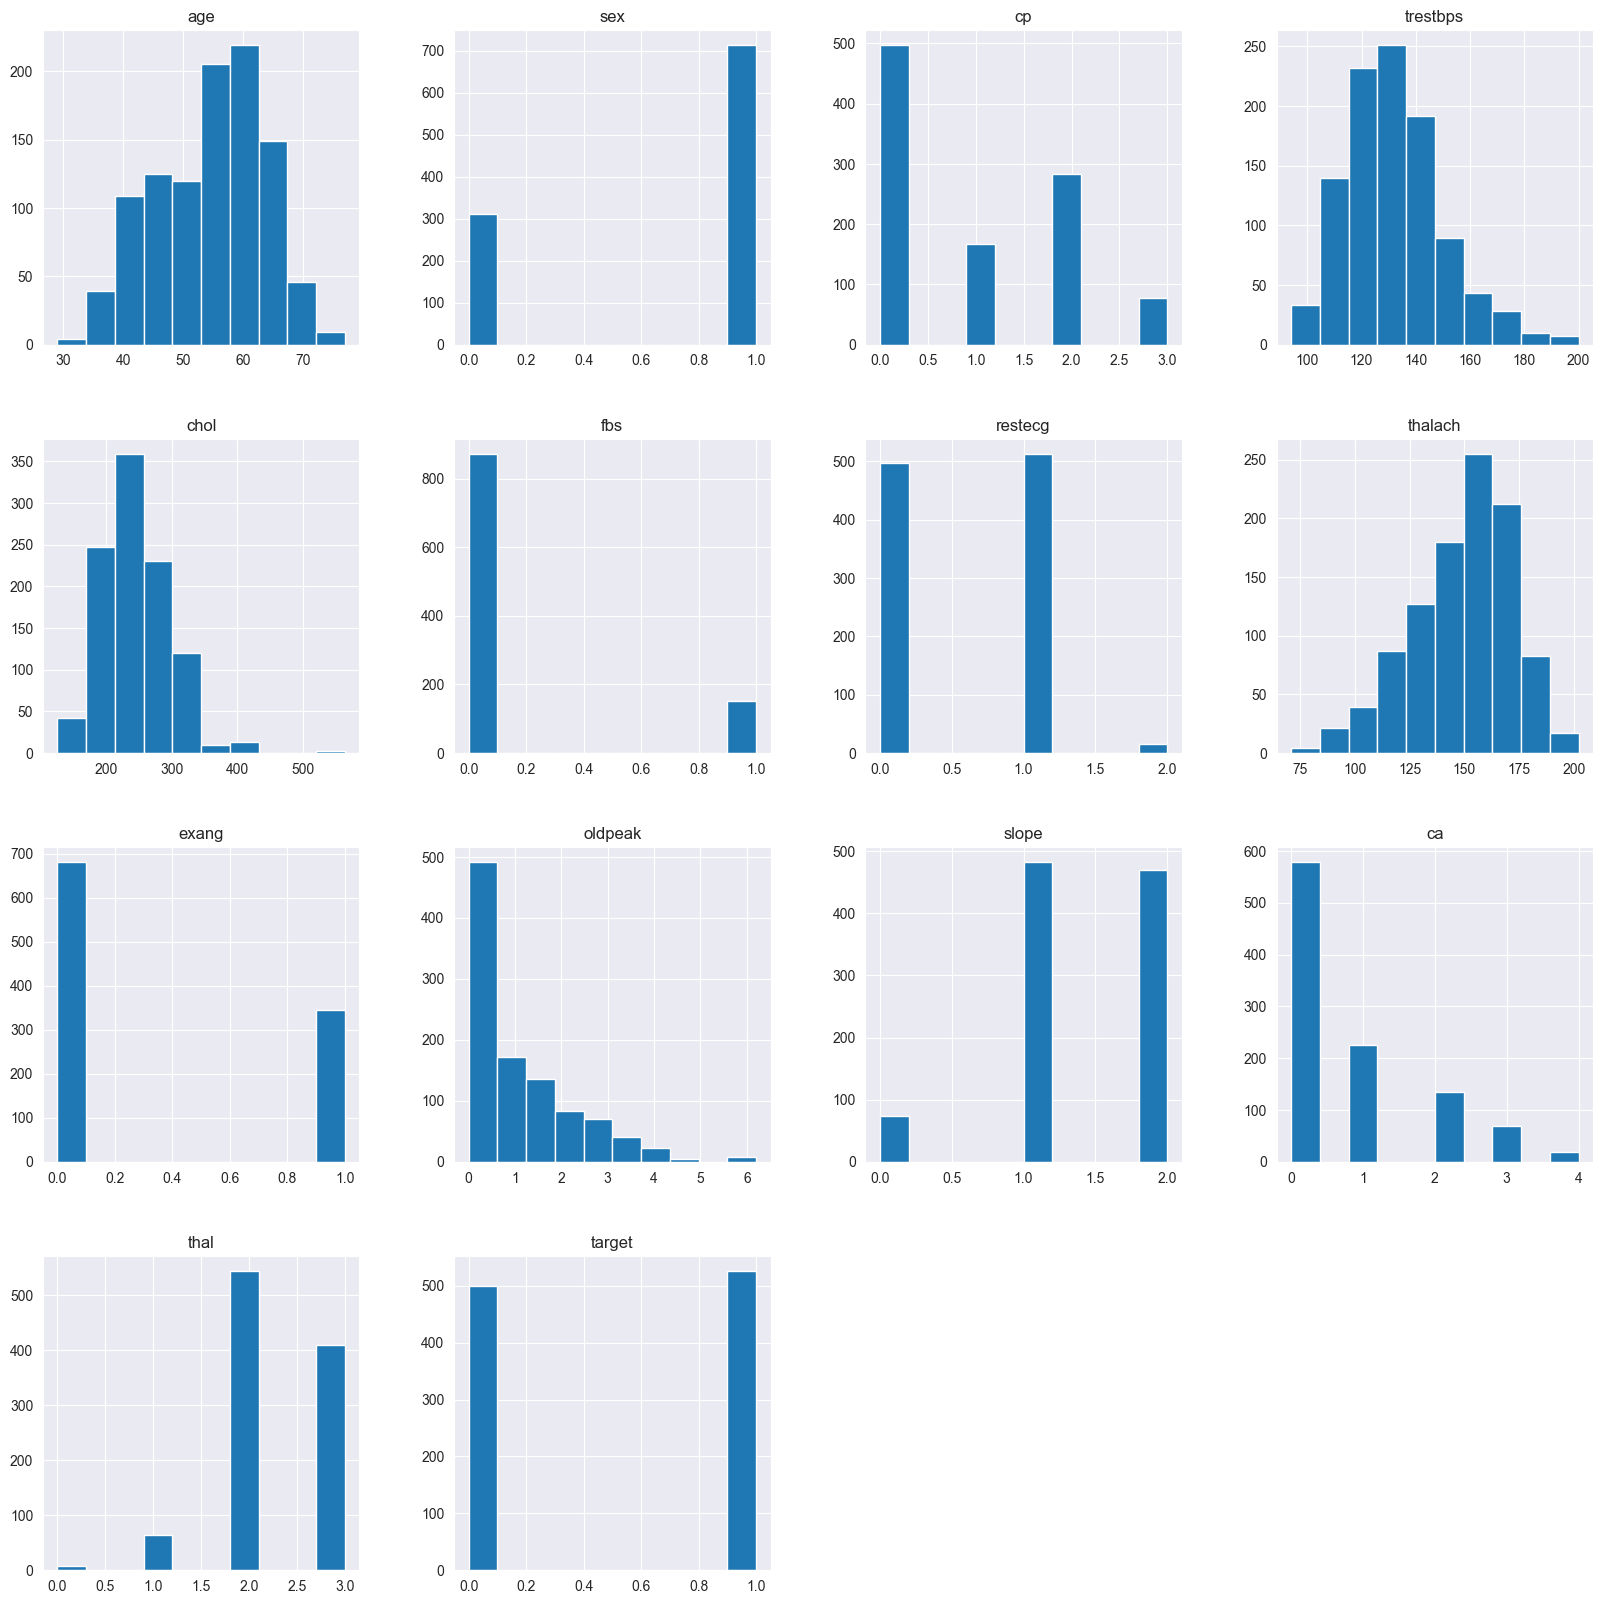

In [17]:
df.hist(figsize=(20,20))

## **Data Processing**

In [18]:
cat_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dataset = pd.get_dummies(df, columns = cat_variables)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [19]:
scaler = StandardScaler()
cl_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[cl_to_scale] = scaler.fit_transform(dataset[cl_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [20]:
df_corr = dataset[cl_to_scale].corr().transpose()
df_corr

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.271121,0.219823,-0.390227,0.208137
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434
chol,0.219823,0.127977,1.000000,-0.021772,0.064880
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000


In [21]:
X = dataset.drop('target', axis=1)
y = dataset.target

### Linear Regression

In [22]:
linear_Reg = LinearRegression()
model1 = cross_val_score(linear_Reg, X, y, cv=10)
print(f"Avg. Cross Val. Score for linear Regression = {model1.mean(): .3f}")

Avg. Cross Val. Score for linear Regression =  0.554


Cross Validation Score of **linear Regression** on this model = **0.554**

### Logistic Regression

In [23]:
log_Reg = LogisticRegression()
model2 = cross_val_score(log_Reg, X, y, cv=10)
print(f"Avg. Cross Val. Score for logistic Regression = {model2.mean(): .3f}")

Avg. Cross Val. Score for logistic Regression =  0.860


Cross Validation Score of **Logistic Regression** on this model = **0.86**

### Decision Tree

In [24]:
Dec_Tree = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5)
cv = StratifiedKFold(n_splits=10)
model3 = cross_val_score(Dec_Tree, X, y, cv=cv)
print(f"Avg. Cross Val. Score for Decision Tree = {model3.mean(): .3f}")

Avg. Cross Val. Score for Decision Tree =  0.887


Cross Validation Score of **Decision Tree** on this model = **0.887**

### Random Forest

In [39]:
Rand_Forest = RandomForestClassifier(n_estimators=5)
model4 = cross_val_score(Rand_Forest, X, y, cv=cv)
print(f"Avg. Cross Val. Score for Random Forest = {model4.mean(): .3f}")

Avg. Cross Val. Score for Random Forest =  0.996


Cross Validation Score of **Random Forest** on this model = **0.887**

### SVM

In [26]:
svm = SVC(gamma='auto')
model5 = cross_val_score(svm, X, y, cv=cv)
print(f"Avg. Cross Val. Score for SVM = {model5.mean(): .3f}")

Avg. Cross Val. Score for SVM =  0.882


Cross Validation Score of **SVM** on this model = **0.887**

### KNearestNeighbor

In [27]:
knn = KNeighborsClassifier(n_neighbors=12)
model6 = cross_val_score(knn, X, y, cv=10)
print(f"Avg. Cross Val. Score for KNN = {model6.mean(): .3f}")

Avg. Cross Val. Score for KNN =  0.864


## **Testing**

In [28]:
log_Reg.fit(test_X, test_y)

LogisticRegression()

In [29]:
y_pred1 = log_Reg.predict(test_X)
print("The test accuracy score of Decision Tree is ", accuracy_score(test_y, y_pred1))

The test accuracy score of Decision Tree is  0.8778877887788779


In [30]:
Dec_Tree.fit(test_X, test_y)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [31]:
y_pred2 = Dec_Tree.predict(test_X)
print("The test accuracy score of Decision Tree is ", accuracy_score(test_y, y_pred2))

The test accuracy score of Decision Tree is  0.9207920792079208


In [32]:
knn.fit(test_X, test_y)

KNeighborsClassifier(n_neighbors=12)

In [33]:
y_pred3 = knn.predict(test_X)
print("The test accuracy score of Decision Tree is ", accuracy_score(test_y, y_pred3))

The test accuracy score of Decision Tree is  0.8547854785478548


In [34]:
Rand_Forest.fit(test_X, test_y)

RandomForestClassifier(n_estimators=2)

In [35]:
y_pred4 = Rand_Forest.predict(test_X)
print("The test accuracy score of Decision Tree is ", accuracy_score(test_y, y_pred4))

The test accuracy score of Decision Tree is  0.8910891089108911


In [36]:
svm.fit(test_X, test_y)

SVC(gamma='auto')

In [37]:
y_pred5 = svm.predict(test_X)
print("The test accuracy score of Decision Tree is ", accuracy_score(test_y, y_pred5))

The test accuracy score of Decision Tree is  0.8613861386138614
